<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/prophet_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#modulo 03 aula 01 

In [2]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv(url, sep=";")

In [5]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [6]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [7]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

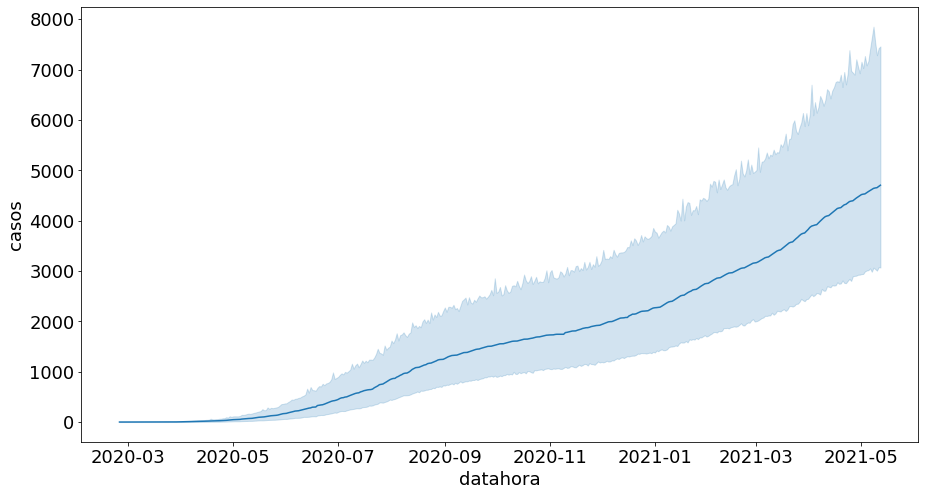

In [8]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)
sns.lineplot(x = "datahora", y="casos", data = dados)

# $$ e^x $$

In [9]:
import numpy as np

In [10]:
eixo_x = np.linspace(-2,2,100)

In [11]:
y_exp = np.exp(eixo_x)

Exemplo de curva logaritmica usando o numpy

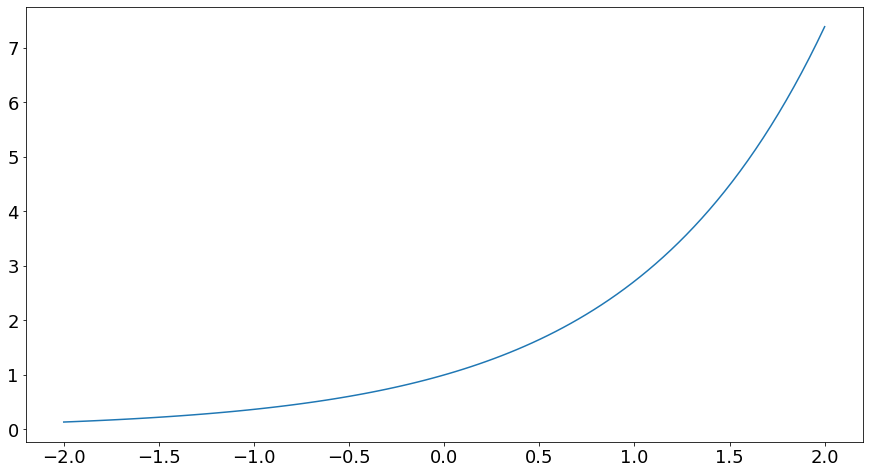

In [12]:
sns.lineplot(x=eixo_x, y = y_exp)

# $$log_2 2 = 1 $$
# $$log_2 2^x = X $$
# $$log_e e^x = x $$

Existe um crescimento exponencial para os dados. A reta mostra que o crecimento é ordenado

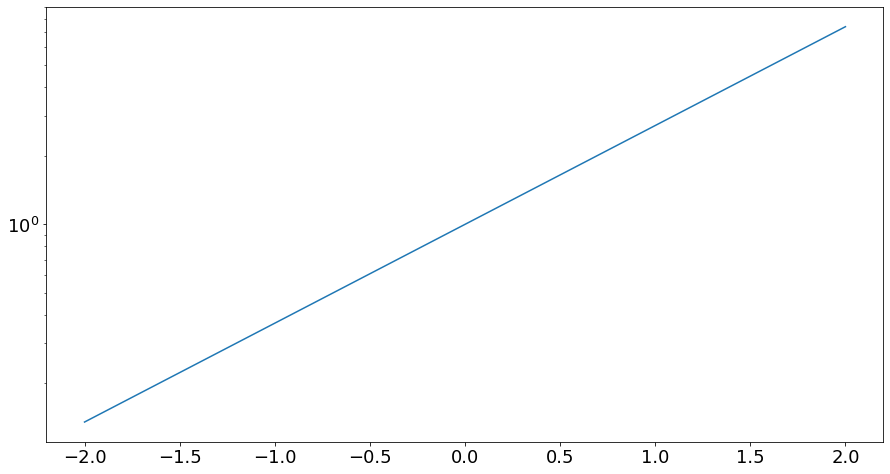

In [13]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [14]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

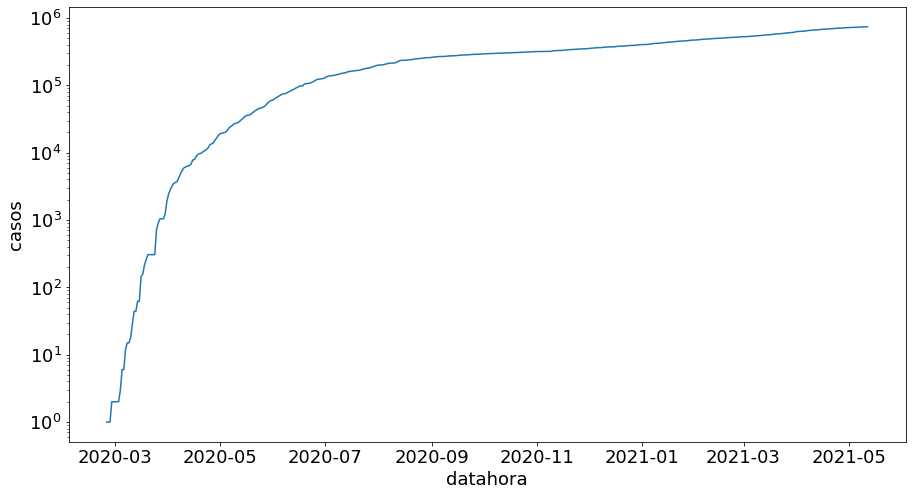

In [15]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

Crescimento exponencial do estado de são paulo. Não ordenado , porém é um crescimento exponencial

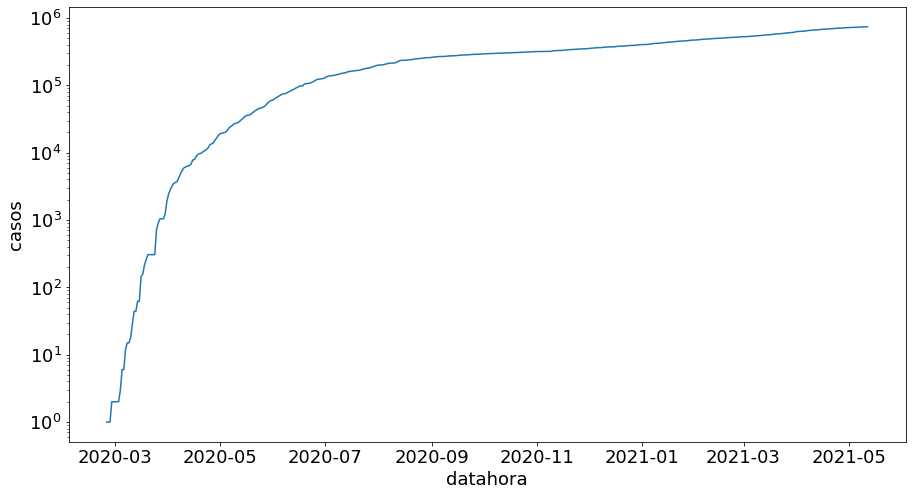

In [16]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

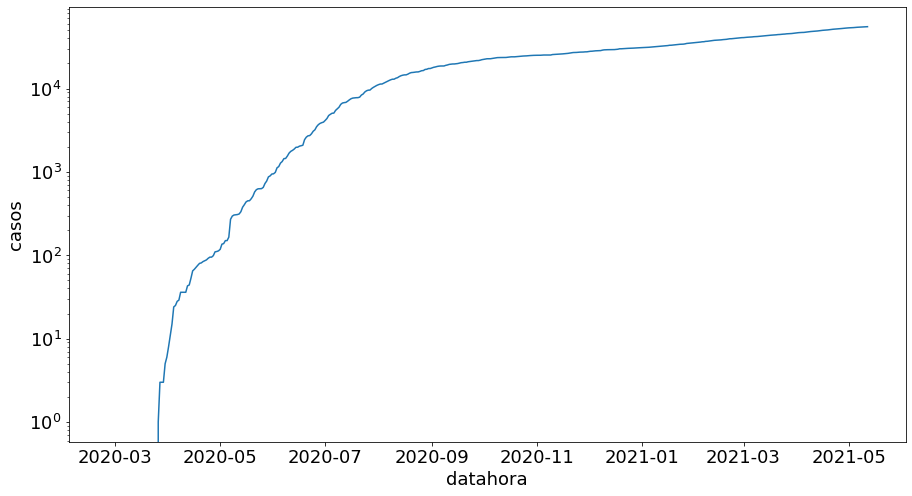

In [17]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")
sns.lineplot(x="datahora", y="casos", data=dados_rp)
mpl.pyplot.yscale("log")

#modulo 03 aula 01 

casos novos de covid

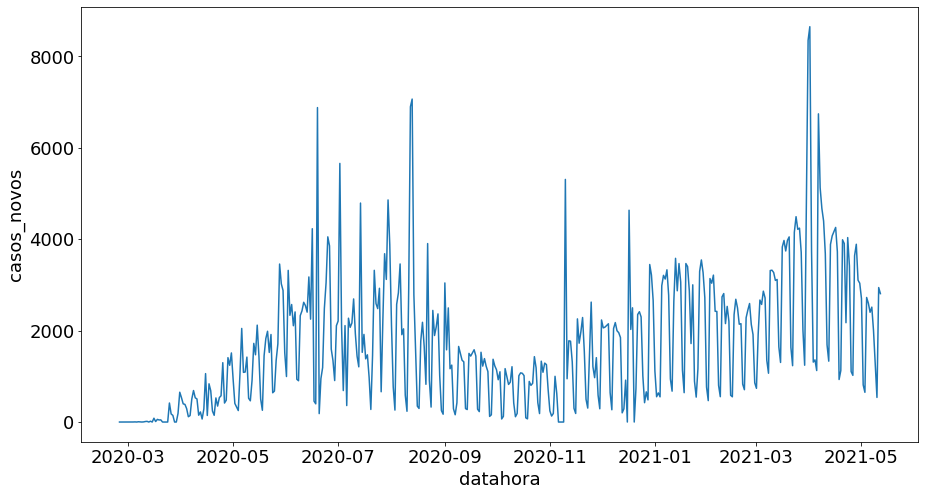

In [18]:
sns.lineplot(x="datahora", y="casos_novos", data = dados_sp)

mostrando um exemplo de diferenciação. Neste exemplo a diferenciação tem uma reta horizontal, pois o crescimento é horizontal e com um mesmo coeficiente que 1. Para gráficos exponenciais haverá variação na diferenciação

In [19]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [20]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [21]:
dados_exemplo["diferenciado"] = dados_exemplo.diff()

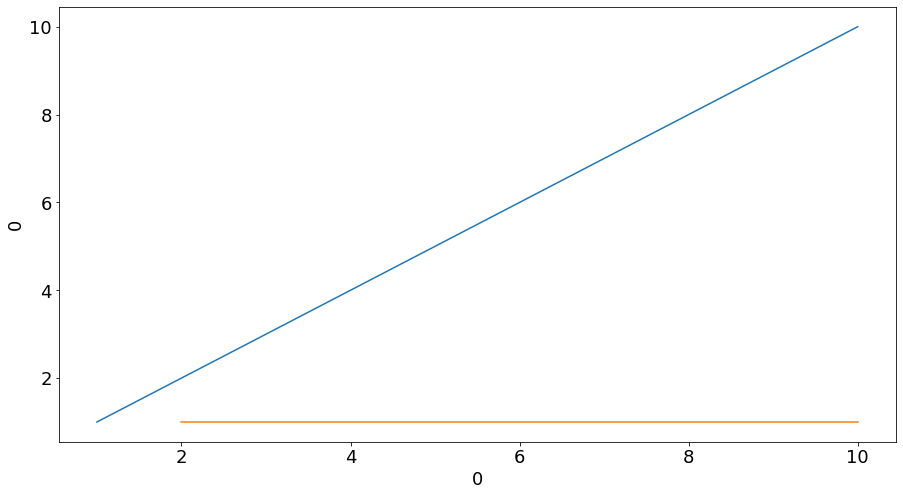

In [22]:
sns.lineplot(data = dados_exemplo,x=0, y=0)
sns.lineplot(data = dados_exemplo,x=0, y='diferenciado')

Fazendo uma diferenciação dos dados de são paulo

In [23]:
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


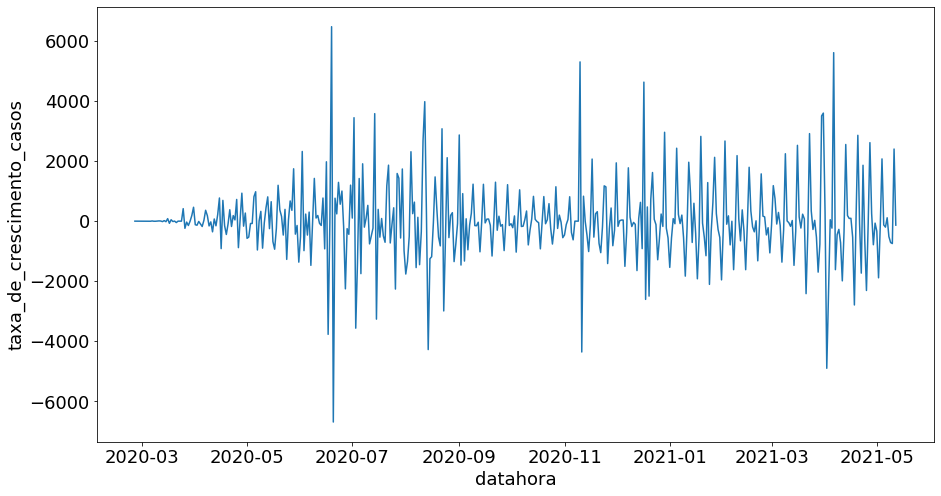

In [24]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)

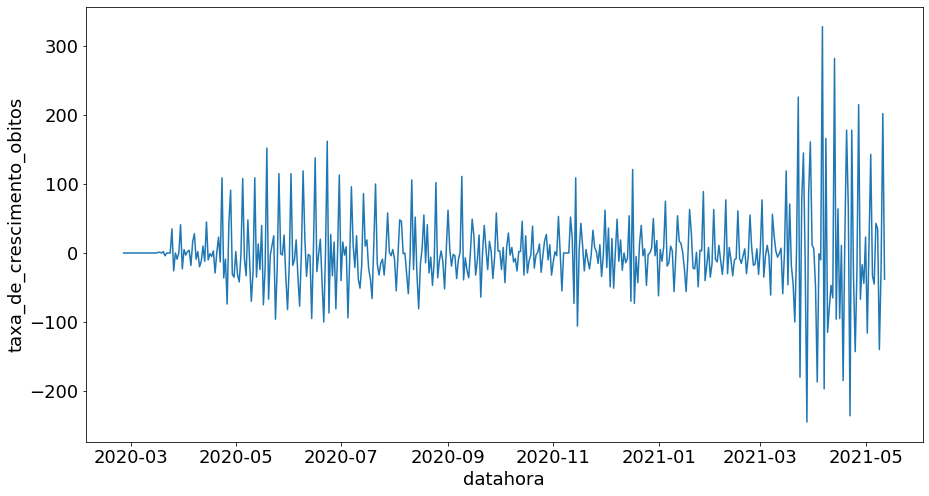

In [25]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

<BarContainer object of 443 artists>

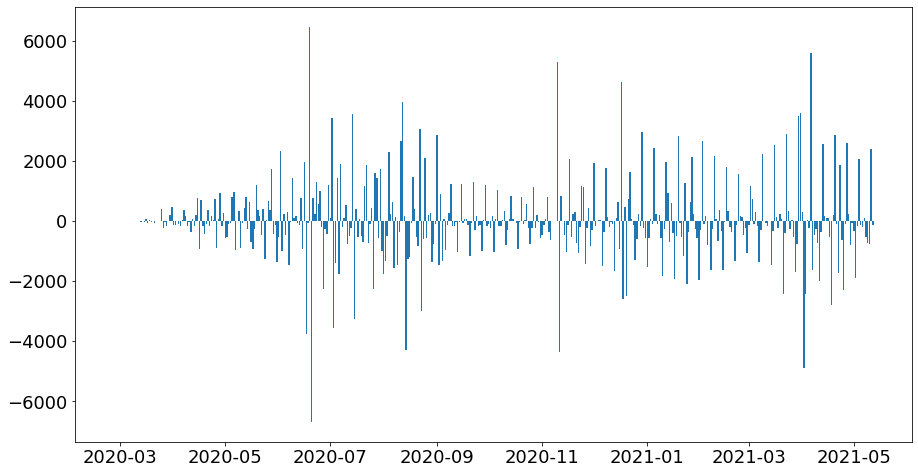

In [26]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [27]:
dados_sp["ano"] = pd.DatetimeIndex(dados_sp["datahora"]).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dados_2021 = dados_sp.query('ano == "2021"')

<BarContainer object of 132 artists>

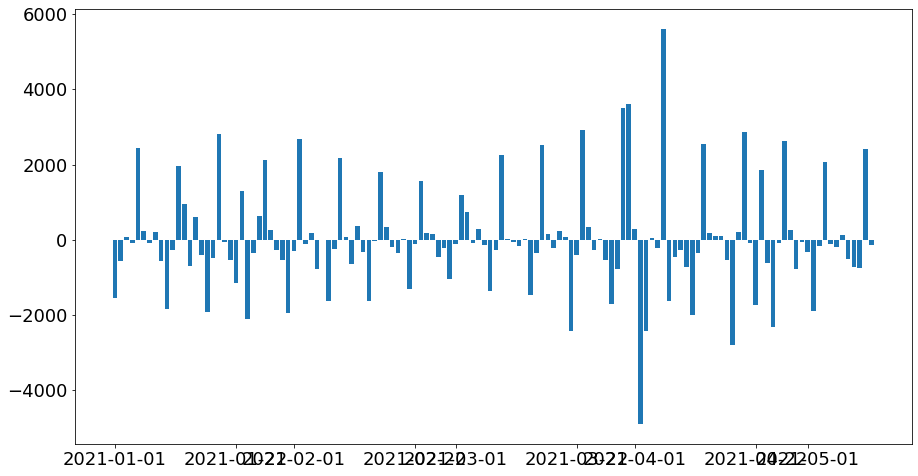

In [29]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

o gráfico acima é mais usado para análise, não é passado para uma pessoa leiga  analisar

Abaixo temos a criação de uma janela de 7 dias para média móvel, ou seja, a cada 7 dias é gerado uma média e vai rolando até o final da dataframe.
## A média móvel serve para suavisar os picos dos gráficos e diminuir o efeito de sazonalidade, mostrando de maneira mais fiel a tendencia destes dados

In [30]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


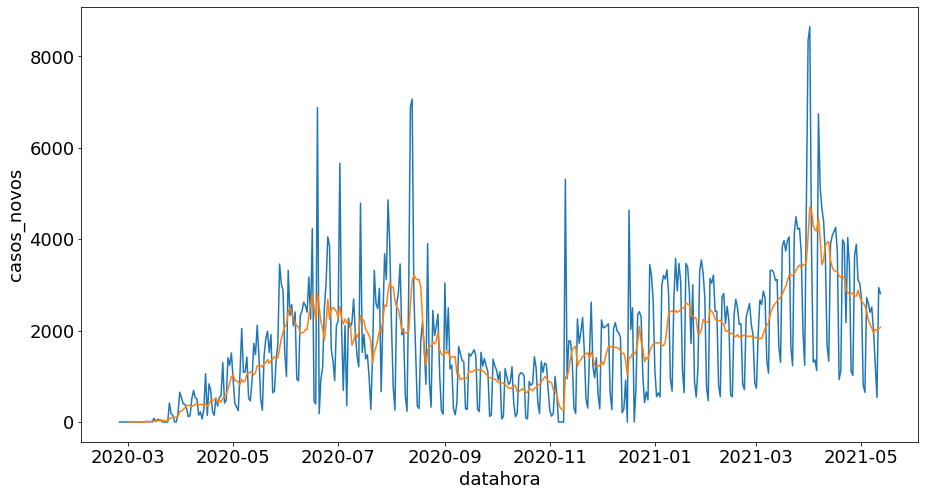

In [31]:
sns.lineplot(x = "datahora", y= "casos_novos", data = dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp )

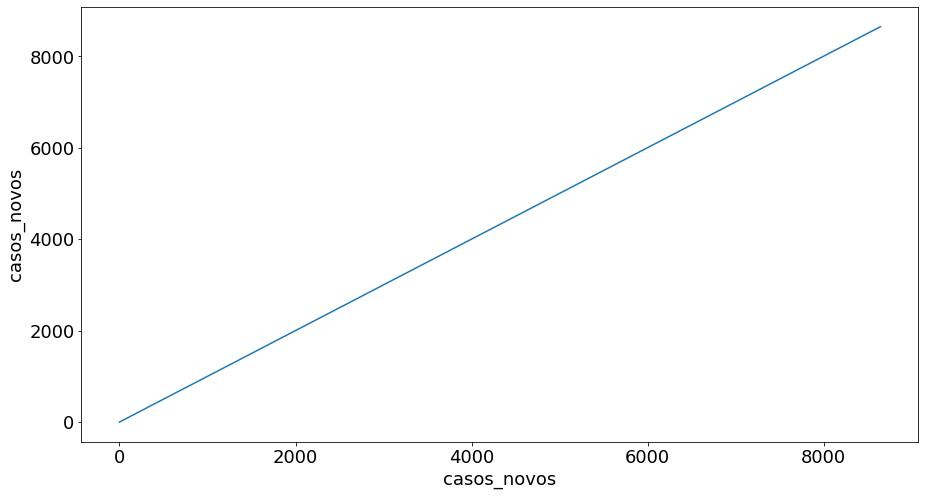

In [32]:
#verificando correlação. Verificando uma correlação perfeita, correlacionando a mesma variável
sns.lineplot(x="casos_novos", y="casos_novos", data = dados_sp)

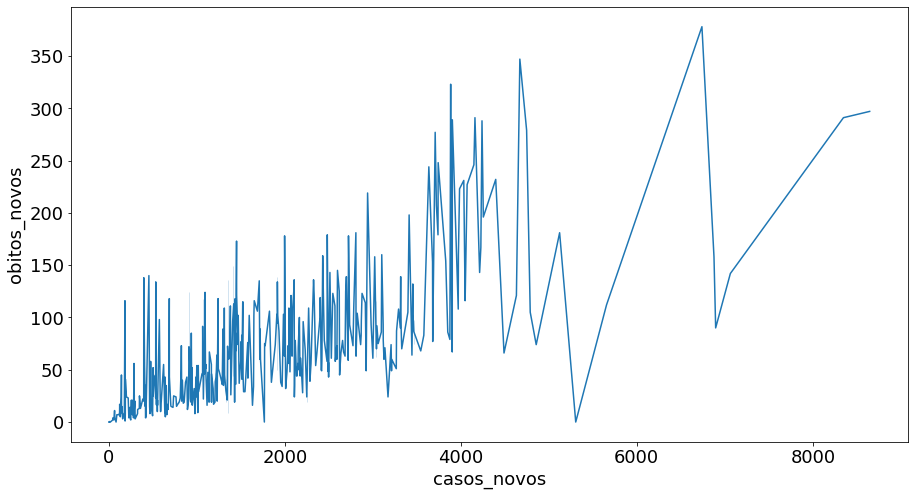

In [33]:
sns.lineplot(x="casos_novos", y="obitos_novos", data = dados_sp)

In [34]:
dados_202005 = dados_sp.query("mes == 5 & ano == 2020")
dados_202101 = dados_sp.query("mes == 1 & ano == 2021")
dados_202102 = dados_sp.query("mes == 2 & ano == 2021")
dados_202103 = dados_sp.query("mes == 3 & ano == 2021")
dados_202104 = dados_sp.query("mes == 4 & ano == 2021")

#Abaixo observamos a sazonalidade dos dados, onde existe um padrão no comportamento dos dados na linha do tempo.

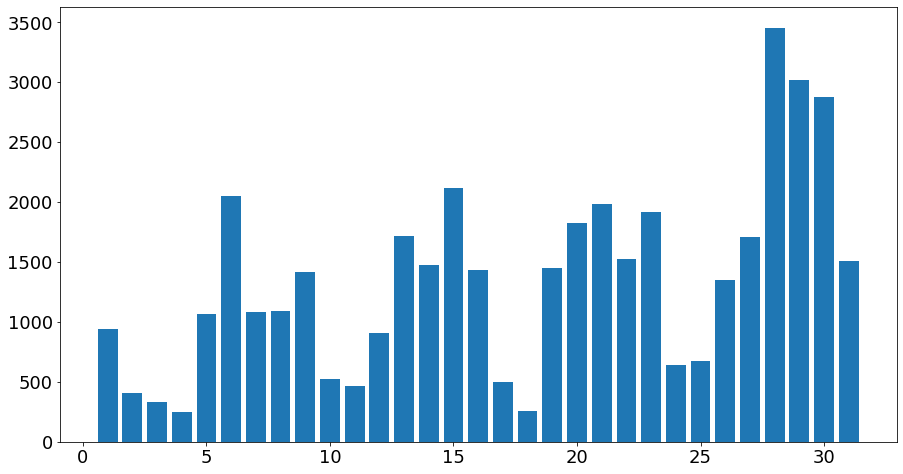

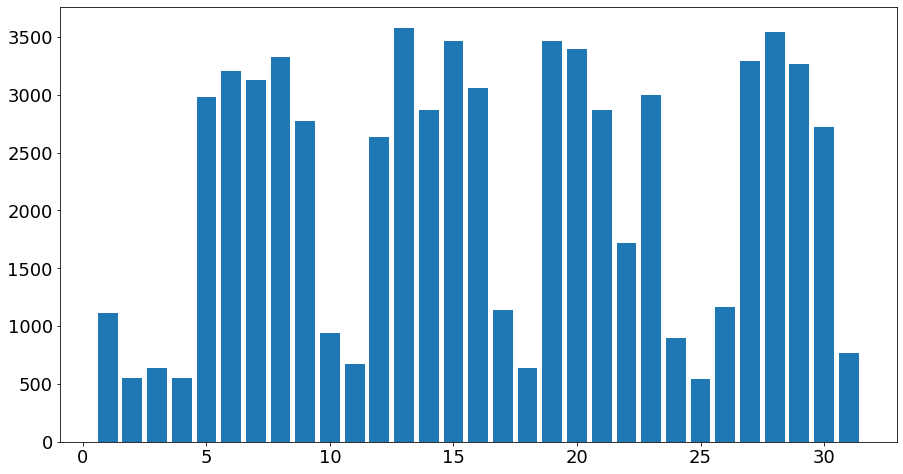

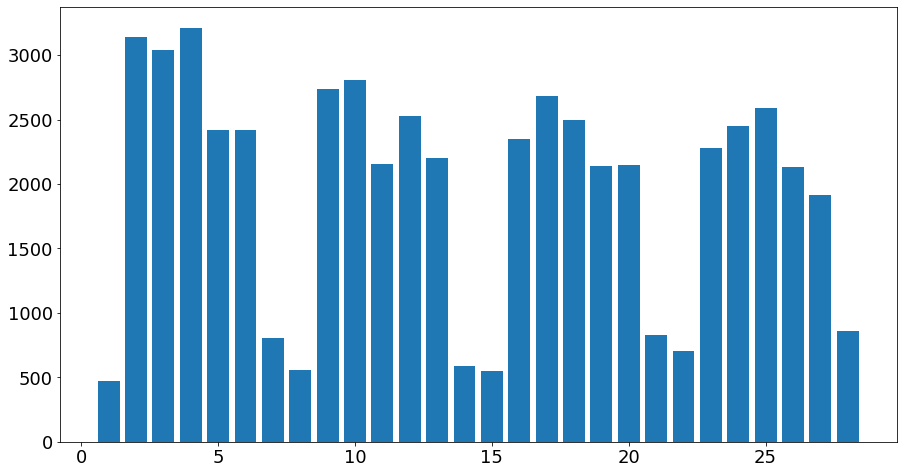

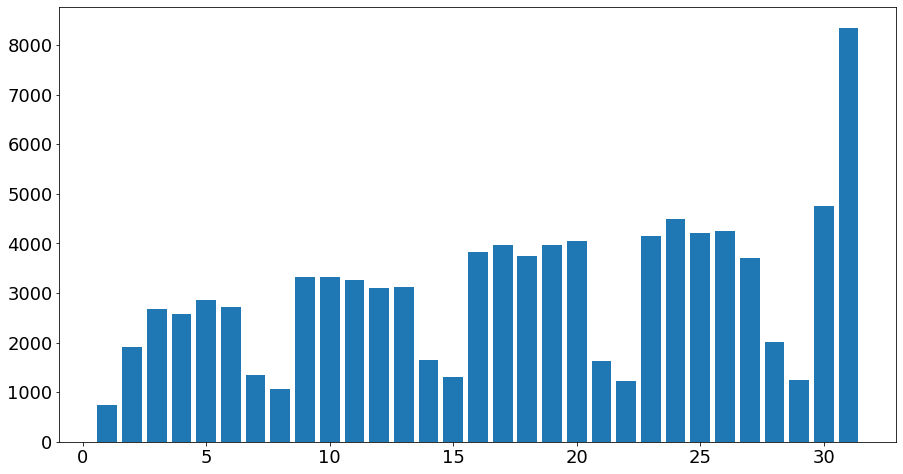

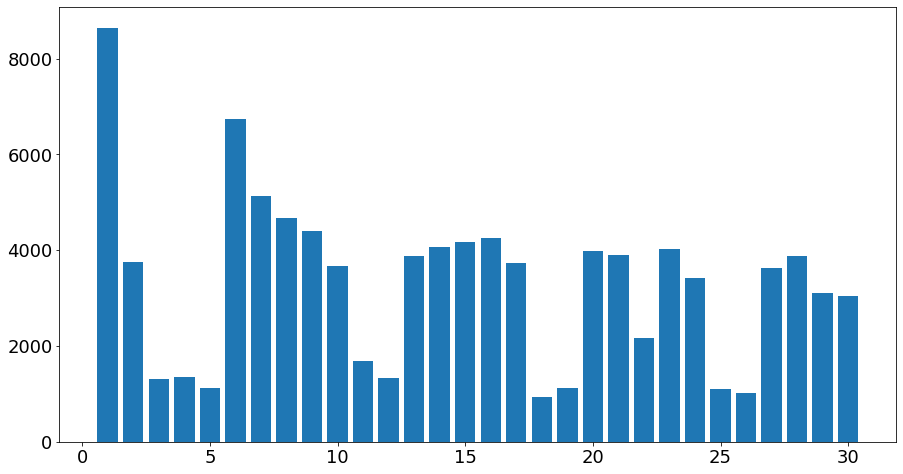

In [35]:
plt.bar(np.linspace(1,31,31),  dados_202005["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202101["casos_novos"])
plt.show()
plt.bar(np.linspace(1,28,28),  dados_202102["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202103["casos_novos"])
plt.show()
plt.bar(np.linspace(1,30,30),  dados_202104["casos_novos"])
plt.show()

In [36]:
from pandas.plotting import autocorrelation_plot

#O gráfico abaixo mostra que existe uma correlação entre os dados no tempo. A medida que ao tempo passa esta correlação diminui.quanto mais próximo de 0 menos correlação.

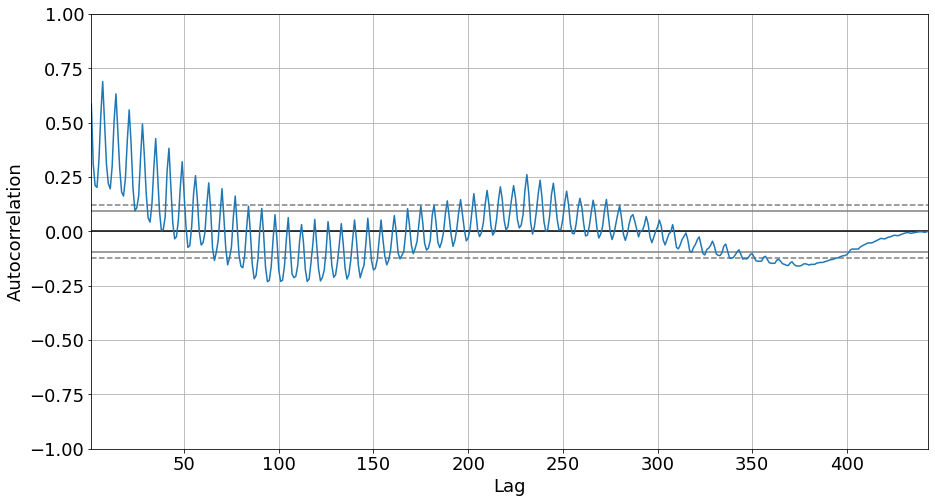

In [37]:
autocorrelation_plot(dados_sp["casos_novos"])

#Abaixo temos um exemplo por meio de numeros aleatórios de correlação baixa.

In [38]:
dados_sp.shape

(443, 31)

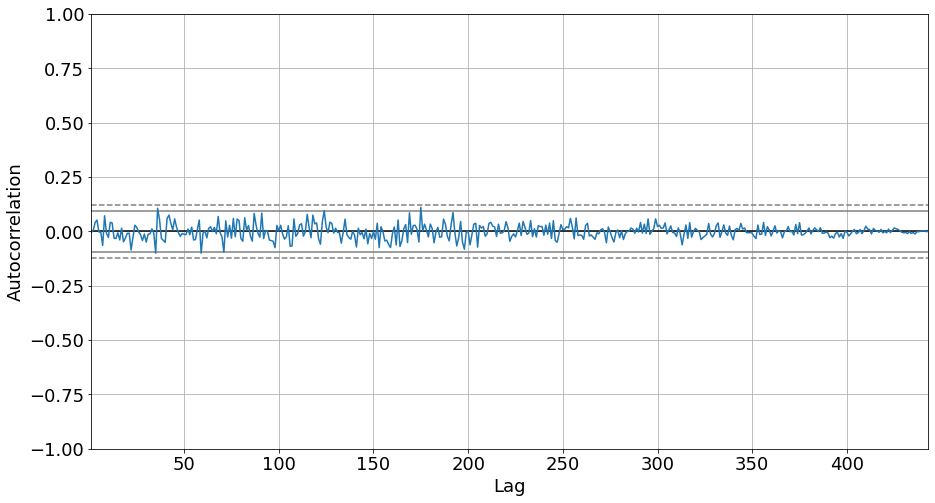

In [39]:
aleatorio = np.random.rand(443)
autocorrelation_plot(aleatorio)

#Nesta aula:
 - Aprendemos o que é uma série temporal;

 - Calculamos a taxa de crescimento de um evento em uma série temporal;

 - Aprendemos o que é uma média móvel;

 - Entendemos o que é correlação e função de autocorrelação.

#Módulo 03 Aula 02

In [40]:
df = pd.DataFrame()

In [41]:
df['ds'] = dados_sp['datahora']

In [42]:
df['y'] = dados_sp['casos_novos']

In [43]:
from fbprophet import Prophet

In [44]:
#ajustar uma reta aos dados
modelo = Prophet()

In [45]:
#carregando o modelo com o dataframe
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
dataFramefuturo = modelo.make_future_dataframe(periods=30)

In [47]:
dataFramefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [48]:
previsao = modelo.predict(dataFramefuturo)

In [49]:
#usa o DS e o YHAT para gerar a previsão
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-114.303728,-827.199029,1608.291345,-114.303728,-114.303728,500.316952,500.316952,500.316952,500.316952,500.316952,500.316952,0.0,0.0,0.0,386.013224
1,2020-02-26,-96.932780,-750.587808,1687.011904,-96.932780,-96.932780,554.767711,554.767711,554.767711,554.767711,554.767711,554.767711,0.0,0.0,0.0,457.834930
2,2020-02-27,-79.561833,-699.622496,1751.486577,-79.561833,-79.561833,650.710000,650.710000,650.710000,650.710000,650.710000,650.710000,0.0,0.0,0.0,571.148167
3,2020-02-28,-62.190885,-967.328187,1466.010365,-62.190885,-62.190885,368.442066,368.442066,368.442066,368.442066,368.442066,368.442066,0.0,0.0,0.0,306.251181
4,2020-02-29,-44.819937,-1261.353604,1246.581554,-44.819937,-44.819937,30.824737,30.824737,30.824737,30.824737,30.824737,30.824737,0.0,0.0,0.0,-13.995200


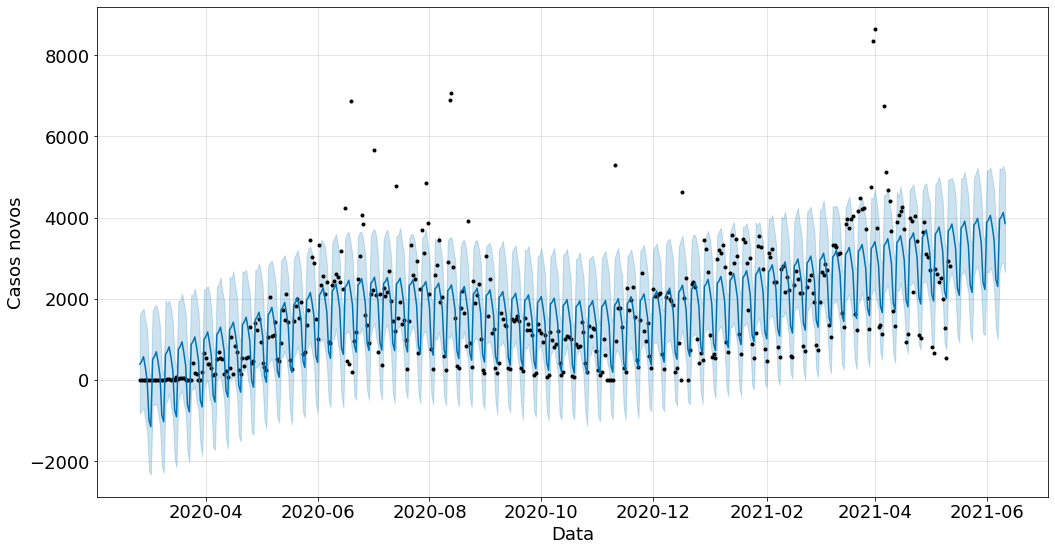

In [50]:
# alinha azul clao é um intervalo de confiança.
# o prophet consegue observar a sazonalidade dos dados. Ele mesmo identifica a sazonalidade.
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(15,8));

Criando teste e ajuste

In [51]:
df2 = pd.DataFrame()
df2['ds'] = dados_sp['datahora'][:400]
df2['y'] = dados_sp['casos_novos'][:400]
from fbprophet import Prophet
modelo2 = Prophet()
modelo2.fit(df2)
dataFramefuturo2 = modelo2.make_future_dataframe(periods=43)
previsao2 = modelo2.predict(dataFramefuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
df2_teste = pd.DataFrame()
df2_teste['ds'] = dados_sp['datahora'][400:]
df2_teste['y'] = dados_sp['casos_novos'][400:]

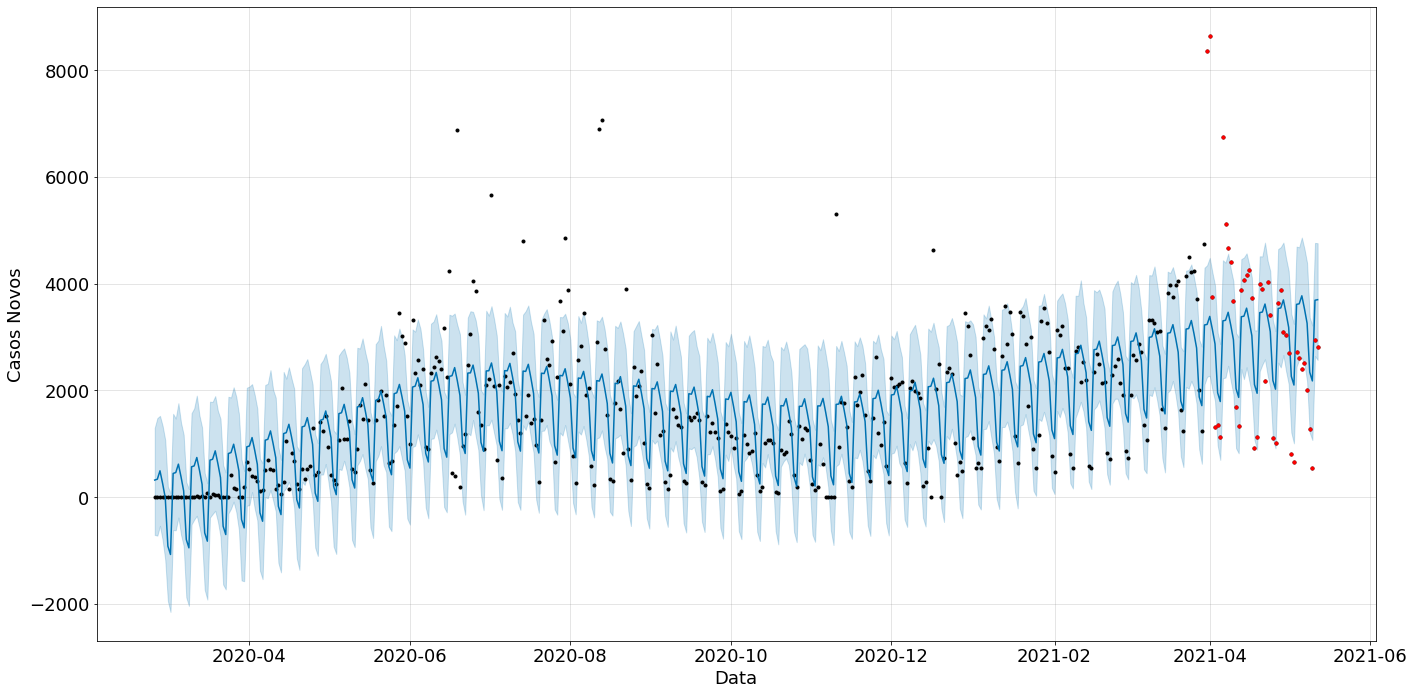

In [53]:
modelo.plot(previsao2, xlabel="Data", ylabel="Casos Novos", figsize=(20,10));
plt.plot(df2_teste['ds'], df2_teste['y'],'.r')

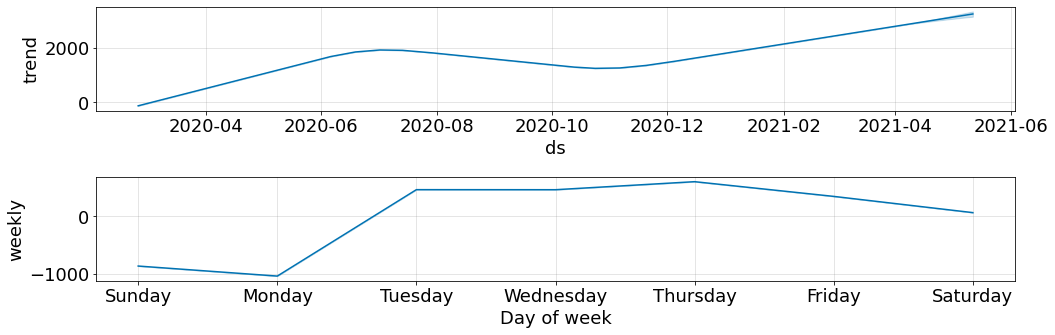

In [54]:
modelo2.plot_components(previsao2, figsize = (15,5));

#Nesta aula:
 - Vimos as primeiras previsões com o PROPHET;

 - Fizemos a decomposição de séries temporais.

#Aula 03 modulo 03

mudanças de tendências. Padrã que o gráfico está seguindo. Um gráfico possui uma tendÊncia que pode ser crescente e decrescente em uma linha temporal.

In [55]:
from fbprophet.plot import add_changepoints_to_plot

É possível ver o momento em que se está alterando a tedência da serie temporal

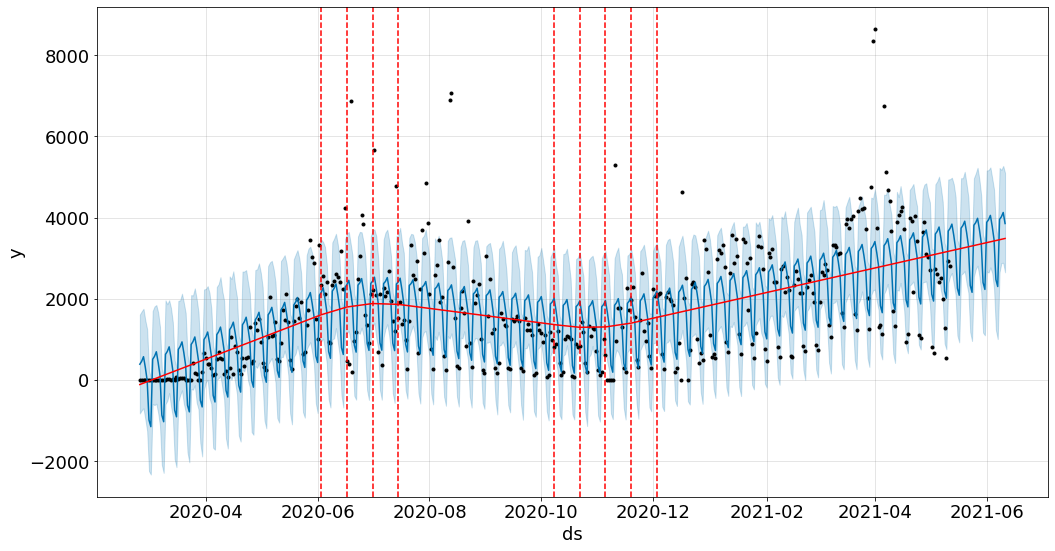

In [56]:
fig = modelo.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

incluir mais change points aumentando a scala para não apresentar os change points na mesma área.
Aumentando a escala é como se usasemos uma lupa para ver mais de perto as mudanças da tendência. A medida que aumenta mais não há tanta variação.
Se diminuir muito a escala praticamente fica uma reta. 

In [57]:
modelo =  Prophet(n_changepoints=25, changepoint_prior_scale=10)

In [58]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
dataFramefuturo = modelo.make_future_dataframe(periods=43)

In [60]:
previsao = modelo.predict(dataFramefuturo)

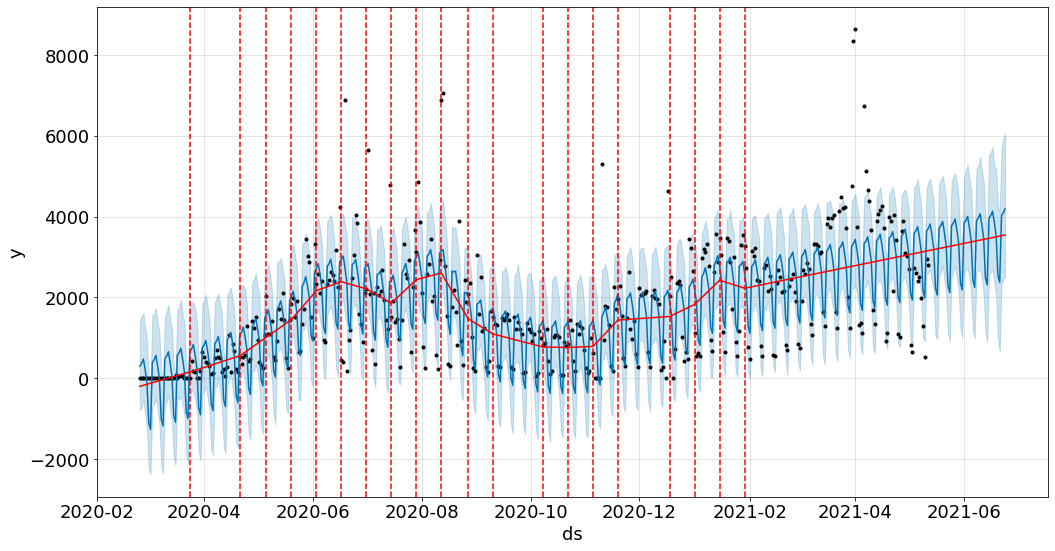

In [61]:
fig = modelo.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


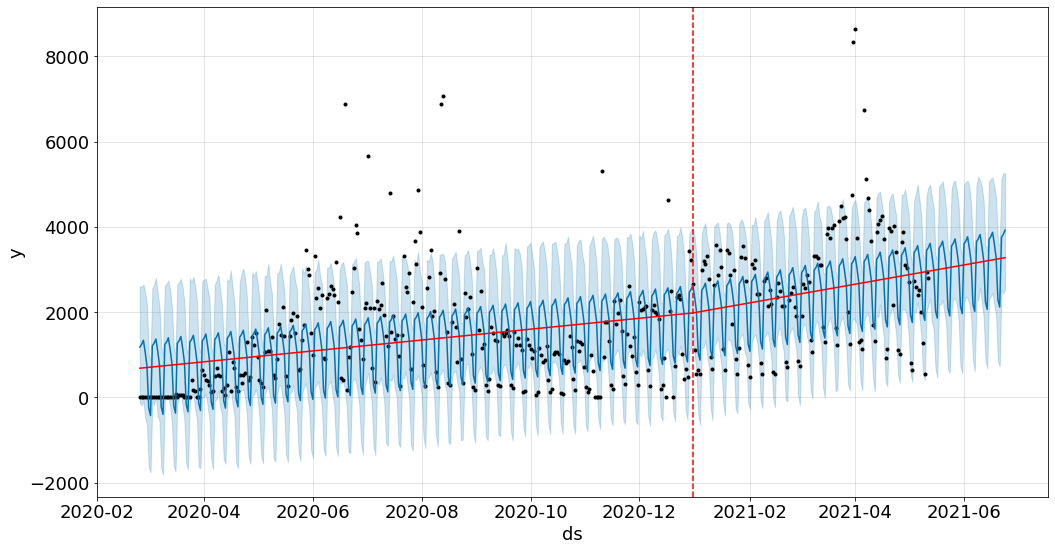

In [62]:
#adicionando um changepoint
modelo2 =  Prophet(changepoints=['2020-12-31'])
modelo2.fit(df)
dataFramefuturo = modelo2.make_future_dataframe(periods=43)
previsao = modelo2.predict(dataFramefuturo)
fig = modelo2.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo2, previsao)

#Nesta aula, aprendemos:
- Curva com o crescimento logístico;

- Mudança de tendência em uma série temporal;

- Como decidir se houve mudança de tendência através de um gráfico de barras.

#Aula 04 modulo 03

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


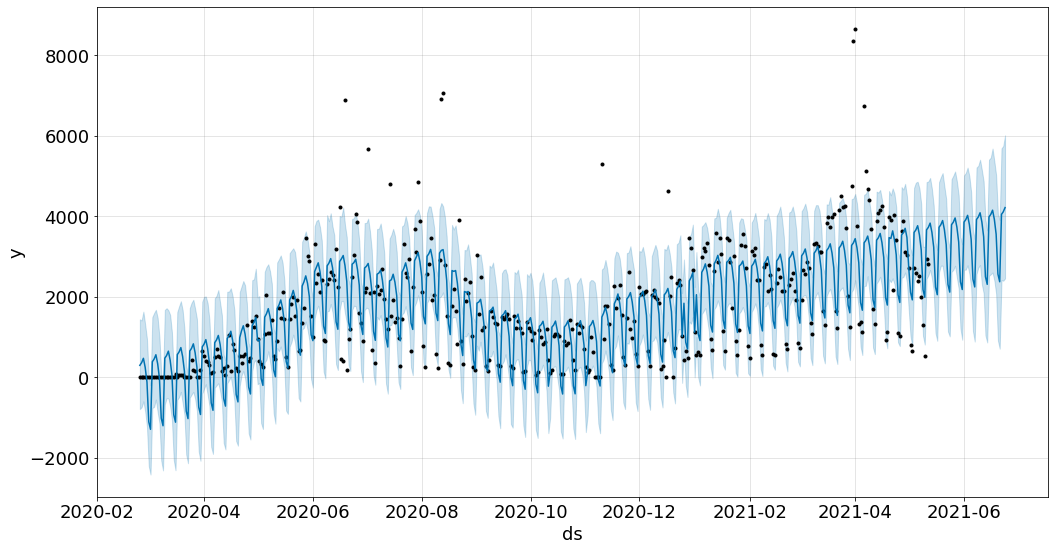

In [68]:
modelo =  Prophet(changepoint_prior_scale=10)
#incluindo os feriados de natal e ano novo (verifique que há uma diferença nos gráficos quando coloca o feriado)
modelo.add_country_holidays(country_name='BR')
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataFramefuturo)
fig = modelo.plot(previsao,figsize=(15,8))


In [92]:
#incluir os feriados municipais de são paulo
lista_feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

lista_feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [93]:
#criar o data frame com os feriados de 2020
feriados_sp_2020 = pd.DataFrame({'holiday':'sp_2020',
                                 'ds': pd.to_datetime(lista_feriados_sp_2020)})

In [94]:
#listando os feriados de 2020
feriados_sp_2020

,holiday,ds
0,sp_2020,2020-02-25
1,sp_2020,2020-02-26
2,sp_2020,2020-04-10
3,sp_2020,2020-04-21
4,sp_2020,2020-05-01
5,sp_2020,2020-05-20
6,sp_2020,2020-05-21
7,sp_2020,2020-05-22
8,sp_2020,2020-05-25
9,sp_2020,2020-06-11


In [95]:
#criar o data frame com os feriados de 2021
feriados_sp_2021 = pd.DataFrame({'holiday':'sp_2021',
                                 'ds': pd.to_datetime(lista_feriados_sp_2021)})

In [96]:
#listando os feriados de 2021
feriados_sp_2021

,holiday,ds
0,sp_2021,2020-01-01
1,sp_2021,2020-01-25
2,sp_2021,2020-02-15
3,sp_2021,2020-02-16
4,sp_2021,2020-02-17
5,sp_2021,2020-03-26
6,sp_2021,2020-03-29
7,sp_2021,2020-03-30
8,sp_2021,2020-03-31
9,sp_2021,2020-04-01


In [97]:
#concatenando os 2 dataframes
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [98]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays = feriados)

In [100]:
modelo_feriados.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
dataFramefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [102]:
previsao = modelo_feriados.predict(dataFramefuturo)

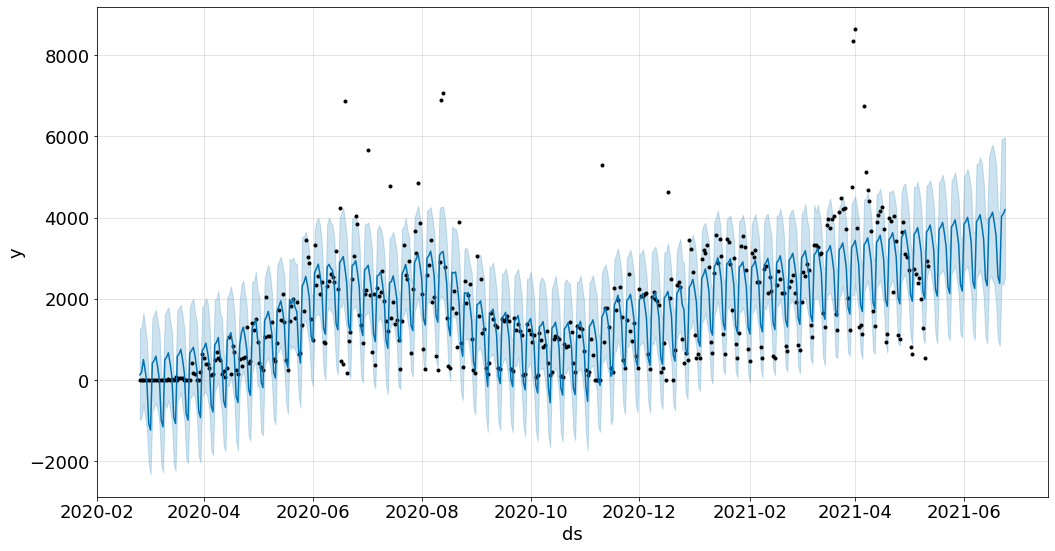

In [103]:
fig = modelo.plot(previsao,figsize=(15,8))

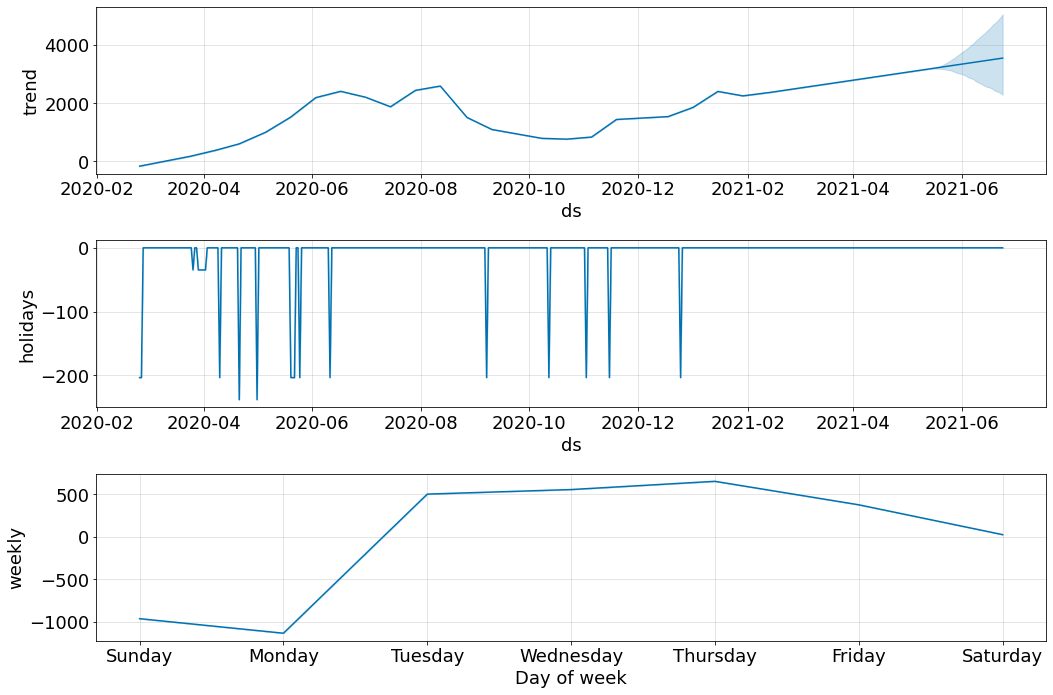

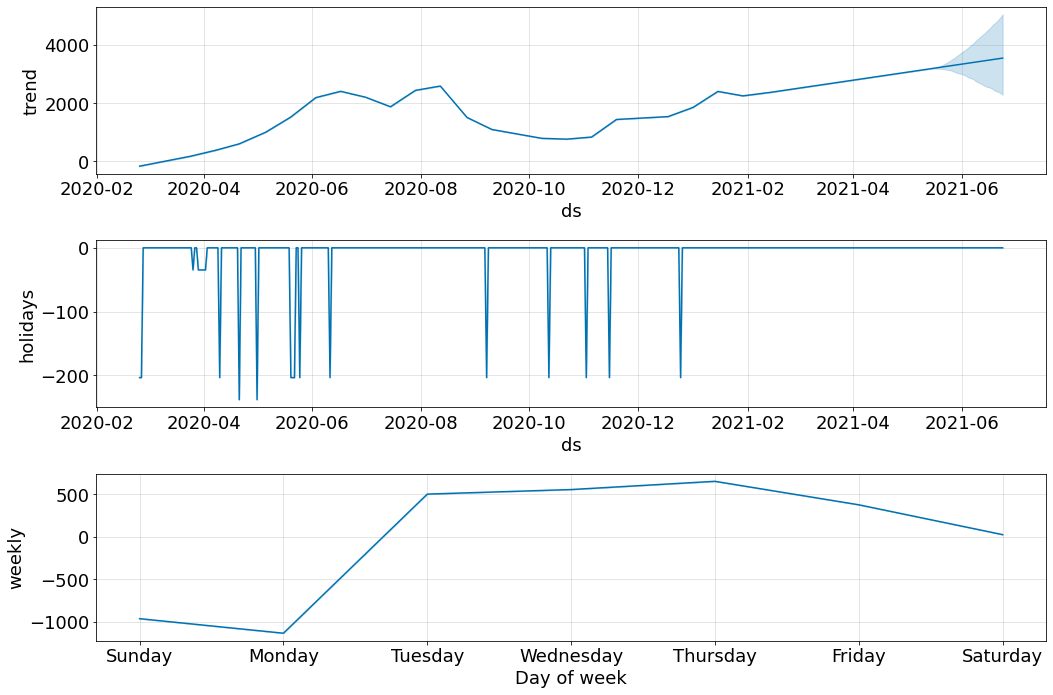

In [104]:
#verificar o impacto dos feriados. Perceba que o gráfico holidays mostra que 2021 teve um impacto maior que os feriados de 2020
modelo_feriados.plot_components(previsao,figsize=(15,10))